In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating Dataset

In [2]:
X = np.random.rand(100, 1)            # features
y = 3 + 2*X + np.random.rand(100, 1)  # labels
print(f"{X[:5]=}")
print(f"{y[:5]=}")

X[:5]=array([[0.30665842],
       [0.31926024],
       [0.20520931],
       [0.33886851],
       [0.32808002]])
y[:5]=array([[3.86068815],
       [3.80376061],
       [3.58441871],
       [3.90109443],
       [4.45253374]])


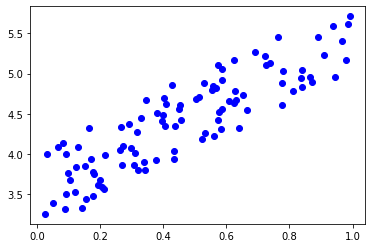

In [3]:
plt.plot(X, y, 'bo')
plt.show()

# Using SKLearn's Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [5]:
theta = lin_reg.intercept_, lin_reg.coef_ # values of theta
theta

(array([3.51891049]), array([[1.93520914]]))

In [6]:
X_new = [[2], [3]]
lin_reg.predict(X_new)

array([[7.38932876],
       [9.3245379 ]])

# Using Normal Equation
$$\theta = \big(X^TX\big)^{-1}X^Ty$$

In [7]:
X_biased = np.c_[np.ones(100), X]   # adding 1's for bias terms
print(X_biased[:5], "...")

[[1.         0.30665842]
 [1.         0.31926024]
 [1.         0.20520931]
 [1.         0.33886851]
 [1.         0.32808002]] ...


In [8]:
y[:5]

array([[3.86068815],
       [3.80376061],
       [3.58441871],
       [3.90109443],
       [4.45253374]])

In [9]:
theta = np.linalg.inv(X_biased.T.dot(X_biased)).dot(X_biased.T.dot(y))
theta

array([[3.51891049],
       [1.93520914]])

In [10]:
X_new = [[0], [3]]
X_new_biased = np.c_[np.ones(2), X_new]
y_new = X_new_biased.dot(theta)
y_new

array([[3.51891049],
       [9.3245379 ]])

## Drawing our Hypothesis Function

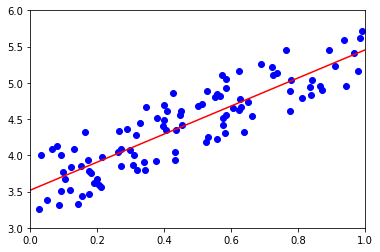

In [11]:
plt.plot(X, y, 'bo')
plt.plot(X_new, y_new, 'r-')
plt.axis([0,1,3,6])
plt.show()

# Gradient Descent

## Batch Gradient Descent

In [12]:
def plot_graph(X_new, Theta):
    y = X_new.dot(Theta)
    plt.plot(X_new, y, 'r-')

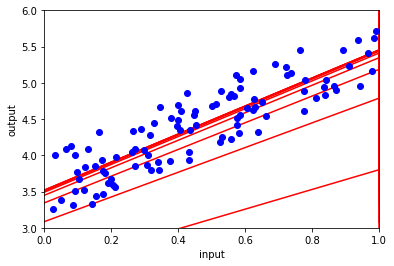

In [13]:
iterations = 100           # no of iterations
Theta = np.random.rand(2,1) # random initialization of Theta
m = len(X)                  # no of examples
alpha = 1.56               # learning rate
for i in range(1, iterations+1):
    grad = X_biased.T.dot(X_biased.dot(Theta) - y)
    Theta = Theta - (alpha/m)*grad
    i % 10 == 0 and plot_graph(X_new_biased, Theta)
plt.axis([0,1,3,6])
plt.plot(X, y, 'bo')
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [14]:
Theta

array([[3.51860693],
       [1.93505146]])

## Stochastic Grdient Descent

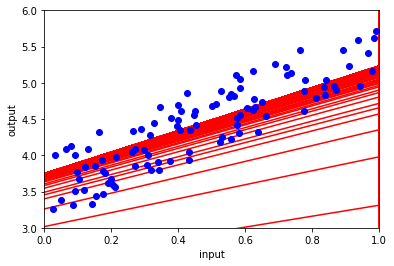

In [15]:
n_epochs = 50
m = len(X)
Theta = np.random.rand(2,1)

t0, t1 = 1, 10
def learning_rate(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        idx = np.random.randint(0, m)
        X_instance = X_biased[idx:idx+1]
        y_instance = y[idx:idx+1]
        grad = X_instance.T.dot(X_instance.dot(Theta) - y_instance)
        Theta = Theta - learning_rate(epoch*m+i) * grad
        i % 10 == 0 and plot_graph(X_new_biased, Theta)
plt.axis([0,1,3,6])
plt.plot(X, y, 'bo')
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [16]:
Theta

array([[3.73623165],
       [1.49441554]])

## Mini Batch Gradient Descent

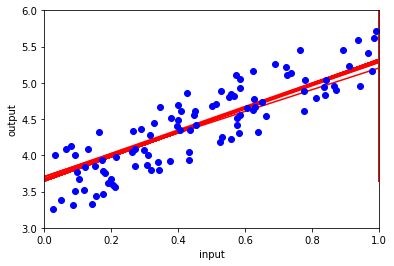

In [17]:
batch_size = 5
for epoch in range(n_epochs):
    for i in range(m//batch_size):
        idx = np.random.randint(0, m-batch_size)
        X_instance = X_biased[idx:idx+batch_size]
        y_instance = y[idx:idx+batch_size]
        grad = X_instance.T.dot(X_instance.dot(Theta) - y_instance)
        Theta = Theta - learning_rate(epoch*m+i) * grad
        i % 10 == 0 and plot_graph(X_new_biased, Theta)
plt.axis([0,1,3,6])
plt.plot(X, y, 'bo')
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [18]:
Theta

array([[3.64509119],
       [1.67710215]])